## Neural Networks Project

### The Problem Description: 
Recognizing multi-digit numbers in photographs captured at street level is an important component of modern-day map making. A classic example of a corpus of such street level photographs is Google’s Street View imagery comprised of hundreds of millions of geo-located 360 degree panoramic images. The ability to automatically transcribe an address number from a geo-located patch of pixels and associate the transcribed number with a known street address helps pinpoint, with a high degree of accuracy, the location of the building it represents.<br>
<br>
More broadly, recognizing numbers in photographs is a problem of interest to the optical character recognition community. While OCR on constrained domains like document processing is well studied, arbitrary multi-character text recognition in photographs is still highly challenging. This difficulty arises due to the wide variability in the visual appearance of text in the wild on account of a large range of fonts, colours, styles, orientations, and character arrangements. The recognition problem is further complicated by environmental factors such as lighting, shadows, secularities, and occlusions as well as by image acquisition factors such as resolution, motion, and focus blurs. <br>
<br>
In this project we will use dataset with images centred around a single digit (many of the images do contain some distractors at the sides). Although we are taking a sample of the data which is simpler, it is more complex than MNIST because of the distractors. <br>

### Data Description:

The Street View House Numbers (SVHN) Dataset SVHN is a real-world image dataset for developing machine learning and object recognition algorithms with minimal requirement on data formatting but comes from a significantly harder, unsolved, real world problem (recognizing digits and numbers in natural scene images). SVHN is obtained from house numbers in Google Street View images.

### Link to the dataset:

https://drive.google.com/file/d/1L2-WXzguhUsCArrFUc8EEkXcj33pahoS/view?usp=sharing

### Acknowledgement for the datasets.

Yuval Netzer, Tao Wang, Adam Coates, Alessandro Bissacco, Bo Wu, Andrew Y. Ng Reading Digits in Natural Images with Unsupervised Feature Learning NIPS Workshop on Deep Learning and Unsupervised Feature Learning 2011. PDF http://ufldl.stanford.edu/housenumbers as the URL for this site when necessary

### Objective:
The objective of the project is to learn how to implement a simple image classification pipeline based on a deep neural network. The goals of this project are as follows:

### Steps and tasks:

### 1. Load Dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# fix random seed for reproducibility
seed = 7
# Set `PYTHONHASHSEED` environment variable at a fixed value
import os
os.environ['PYTHONHASHSEED']=str(seed)
# numpy random value set
np.random.seed(seed)


In [3]:
# load the file
filename = "/content/drive/My Drive/SVHN_single_grey1.h5"

with h5py.File(filename, "r") as f:
    keys=list(f.keys())
    # List all groups
    print("Keys:", keys)
    X_test =list(f['X_test'])
    X_train =list(f['X_train'])
    X_val =list(f['X_val'])
    y_test =list(f['y_test'])
    y_train =list(f['y_train'])
    y_val =list(f['y_val'])

Keys: ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']


### 2. Understand the basic Image Classification pipeline and the data-driven approach (train/predict stages)

In [ ]:
# Shape of the data for train/val/test
print(" X_train Shape: ", len(X_train),"*",X_train[0].shape[0],"*",X_train[0].shape[1])
print(" X_val Shape: ", len(X_val),"*",X_val[0].shape[0],"*",X_val[0].shape[1])
print(" X_test Shape: ", len(X_test),"*",X_test[0].shape[0],"*",X_test[0].shape[1])

print(" y_train Shape: ", len(y_train))
print(" y_val Shape: ", len(y_val))
print(" y_test Shape: ", len(y_test))

 X_train Shape:  42000 * 32 * 32
 X_val Shape:  60000 * 32 * 32
 X_test Shape:  18000 * 32 * 32
 y_train Shape:  42000
 y_val Shape:  60000
 y_test Shape:  18000


#### Observations:
Validation dataset is more compared to train set which is not the case in general.

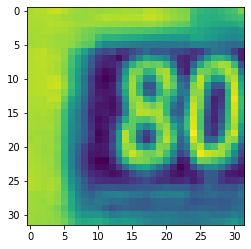

Label: 8


In [ ]:
random_inx = np.random.choice(len(X_train))

test_image = X_train[random_inx]
plt.imshow(test_image)
plt.show()

print("Label:",y_train[random_inx])

### 3. Data fetching and understand the train/val/test splits. (15 points)

In [ ]:
# Get the counts of each digit from different sets
def digit_counts(y):
    print("Below is the split across digits:")
    for i in range(0,10):
         print(i,":",y.count(i))

In [ ]:
# Train data set:

print("Train Dataset:")
digit_counts(y_train)
print("------------------------")
print("Test Dataset:")
digit_counts(y_test)
print("------------------------")
print("Validation Dataset:")
digit_counts(y_val)
print("------------------------")

Train Dataset:
Below is the split across digits:
0 : 4186
1 : 4172
2 : 4197
3 : 4281
4 : 4188
5 : 4232
6 : 4168
7 : 4192
8 : 4188
9 : 4196
------------------------
Test Dataset:
Below is the split across digits:
0 : 1814
1 : 1828
2 : 1803
3 : 1719
4 : 1812
5 : 1768
6 : 1832
7 : 1808
8 : 1812
9 : 1804
------------------------
Validation Dataset:
Below is the split across digits:
0 : 6000
1 : 6000
2 : 6000
3 : 6000
4 : 6000
5 : 6000
6 : 6000
7 : 6000
8 : 6000
9 : 6000
------------------------


In [16]:
# Converting the datasets in numpy arrays
X_test=np.array(X_test).reshape(18000,1024)
X_train=np.array(X_train).reshape(42000,1024)
y_train=np.array(y_train).reshape(42000,1)
y_test=np.array(y_test).reshape(18000,1)
X_val=np.array(X_val).reshape(60000,1024)
y_val=np.array(y_val).reshape(60000,1)

#### Counts in all datasets are uniformly split across digits. Hence we should be able to train the model , can do validation and test the model by giving equal importance for all digits.

### 4. Implement and apply a deep neural network classifier including (feedforward neural network, RELU, activations) (25 points)

In [5]:
import tensorflow as tf
print(tf.__version__)
from tensorflow.random import set_seed
set_seed(seed)

2.3.0


In [6]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten,InputLayer,ReLU,Softmax,BatchNormalization,Dropout
#from tensorflow.keras.activations import relu,softmax
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy
from tensorflow.keras.optimizers.schedules import InverseTimeDecay
from tensorflow.keras.regularizers import L2
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras.models import load_model

In [ ]:
# Deploying a basic model
model=Sequential()
model.add(InputLayer(input_shape=(1024,)))
#model.add(Dense(units=64,use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros',name='Hidden_Layer_1'))
#model.add(ReLU())
model.add(Dense(units=10,use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros',name='Output_Layer'))
model.add(Softmax())


In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Output_Layer (Dense)         (None, 10)                10250     
_________________________________________________________________
softmax_3 (Softmax)          (None, 10)                0         
Total params: 10,250
Trainable params: 10,250
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer=SGD(), loss=SparseCategoricalCrossentropy(), metrics=SparseCategoricalAccuracy(), run_eagerly=None)

In [ ]:
# Data Normalization for faster convergence
X_test_norm=X_test/255.0
X_train_norm=X_train/255.0
X_val_norm=X_val/255.0

In [ ]:
his=model.fit(x=X_train_norm,y=y_train,batch_size=32,epochs=30,validation_data=(X_val_norm,y_val) ,verbose=2)

Epoch 1/30
1313/1313 - 4s - loss: 2.3196 - sparse_categorical_accuracy: 0.1104 - val_loss: 2.3082 - val_sparse_categorical_accuracy: 0.1245
Epoch 2/30
1313/1313 - 4s - loss: 2.3049 - sparse_categorical_accuracy: 0.1266 - val_loss: 2.3116 - val_sparse_categorical_accuracy: 0.1239
Epoch 3/30
1313/1313 - 5s - loss: 2.2958 - sparse_categorical_accuracy: 0.1410 - val_loss: 2.3013 - val_sparse_categorical_accuracy: 0.1461
Epoch 4/30
1313/1313 - 4s - loss: 2.2891 - sparse_categorical_accuracy: 0.1514 - val_loss: 2.2814 - val_sparse_categorical_accuracy: 0.1736
Epoch 5/30
1313/1313 - 4s - loss: 2.2849 - sparse_categorical_accuracy: 0.1607 - val_loss: 2.2807 - val_sparse_categorical_accuracy: 0.1710
Epoch 6/30
1313/1313 - 5s - loss: 2.2829 - sparse_categorical_accuracy: 0.1622 - val_loss: 2.2736 - val_sparse_categorical_accuracy: 0.1685
Epoch 7/30
1313/1313 - 4s - loss: 2.2794 - sparse_categorical_accuracy: 0.1666 - val_loss: 2.2879 - val_sparse_categorical_accuracy: 0.1376
Epoch 8/30
1313/1313

There is no point in checking the test data accuracy as train and validation accuracy itself is very low. 

### 5. Implement batch normalization for training the neural network(10 points)

#### Hyperparameter Tunning:

Below is one approach through which model can be tuned:

1. Try different Optimizers. Adam should be enough and work for most of the cases because its the combination of Momentum and RMSProp.
2. Add Hidden Layers and Introduce batch normalization.
3. Modify the batch size.
4. Change the learning rate and adjust the no. of epochs accordingly.
   Change momentum parameters - beta1 and beta2 if needed.
5. Add Learning rate decay method.
6. Try Regularization techniques - Dropout or L2-Regularization.


#### Optimizer:

In [ ]:
# Using Adam Optimizer
model.compile(optimizer=tf.keras.optimizers.Adam(), loss=SparseCategoricalCrossentropy(), metrics=SparseCategoricalAccuracy(), run_eagerly=None)
model.fit(x=X_train_norm,y=y_train,batch_size=32,epochs=30,validation_data=(X_val_norm,y_val) ,verbose=2)

Epoch 1/30
1313/1313 - 4s - loss: 2.2975 - sparse_categorical_accuracy: 0.1742 - val_loss: 2.2640 - val_sparse_categorical_accuracy: 0.1924
Epoch 2/30
1313/1313 - 5s - loss: 2.2988 - sparse_categorical_accuracy: 0.1744 - val_loss: 2.3156 - val_sparse_categorical_accuracy: 0.1671
Epoch 3/30
1313/1313 - 4s - loss: 2.2982 - sparse_categorical_accuracy: 0.1751 - val_loss: 2.3366 - val_sparse_categorical_accuracy: 0.1601
Epoch 4/30
1313/1313 - 4s - loss: 2.2965 - sparse_categorical_accuracy: 0.1793 - val_loss: 2.3072 - val_sparse_categorical_accuracy: 0.1659
Epoch 5/30
1313/1313 - 4s - loss: 2.2983 - sparse_categorical_accuracy: 0.1782 - val_loss: 2.2973 - val_sparse_categorical_accuracy: 0.1782
Epoch 6/30
1313/1313 - 4s - loss: 2.2920 - sparse_categorical_accuracy: 0.1797 - val_loss: 2.2923 - val_sparse_categorical_accuracy: 0.1741
Epoch 7/30
1313/1313 - 4s - loss: 2.2958 - sparse_categorical_accuracy: 0.1799 - val_loss: 2.2899 - val_sparse_categorical_accuracy: 0.1638
Epoch 8/30
1313/1313

#### Introducing Hidden Layers:

As a standard approach, have reduced the neurons in hidden layers by half w.r.t. corresponding Input layer.

In [7]:
# function to create model and fit based on the params. This doesnt include Dropout
def create_model(learning_rate= 0.001,beta_1=0.9,batch_size=32,epochs=100,kernel_regularizer=0):
    model=Sequential()
    model.add(InputLayer(input_shape=(1024,)))
    model.add(Dense(units=512,use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros',name='Hidden_Layer_1',kernel_regularizer=L2(l2=kernel_regularizer)))
    model.add(BatchNormalization(axis=-1, momentum=0.99))
    model.add(ReLU())
    model.add(Dense(units=256,use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros',name='Hidden_Layer_2',kernel_regularizer=L2(l2=kernel_regularizer)))
    model.add(BatchNormalization(axis=-1, momentum=0.99))
    model.add(ReLU())
    model.add(Dense(units=128,use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros',name='Hidden_Layer_3',kernel_regularizer=L2(l2=kernel_regularizer)))
    model.add(BatchNormalization(axis=-1, momentum=0.99))
    model.add(ReLU())
    model.add(Dense(units=64,use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros',name='Hidden_Layer_4',kernel_regularizer=L2(l2=kernel_regularizer)))
    model.add(BatchNormalization(axis=-1, momentum=0.99))
    model.add(ReLU())
    model.add(Dense(units=32,use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros',name='Hidden_Layer_5',kernel_regularizer=L2(l2=kernel_regularizer)))
    model.add(BatchNormalization(axis=-1, momentum=0.99))
    model.add(ReLU())
    model.add(Dense(units=10,use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros',name='Output_Layer',kernel_regularizer=L2(l2=kernel_regularizer)))
    model.add(Softmax())
    # Compile
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate,beta_1=beta_1), loss=SparseCategoricalCrossentropy(), metrics=SparseCategoricalAccuracy(), run_eagerly=None)
    # Fit
    history=model.fit(x=X_train,y=y_train,batch_size=batch_size,epochs=epochs,validation_data=(X_val,y_val) ,verbose=0)
    return model,history

In [8]:
# function to create model and fit based on the params. This includes Dropout
def create_model_dropout(return_only_model=False, learning_rate= 0.001,beta_1=0.9,batch_size=32,epochs=100,kernel_regularizer=0,dropout_bias=0):
    model=Sequential()
    model.add(InputLayer(input_shape=(1024,)))
    model.add(Dense(units=512,use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros',name='Hidden_Layer_1',kernel_regularizer=L2(l2=kernel_regularizer)))
    model.add(Dropout(rate=0.1+dropout_bias,seed=seed))
    model.add(BatchNormalization(axis=-1, momentum=0.99))
    model.add(ReLU())
    model.add(Dense(units=256,use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros',name='Hidden_Layer_2',kernel_regularizer=L2(l2=kernel_regularizer)))
    model.add(Dropout(rate=0.1+dropout_bias,seed=seed))
    model.add(BatchNormalization(axis=-1, momentum=0.99))
    model.add(ReLU())
    model.add(Dense(units=128,use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros',name='Hidden_Layer_3',kernel_regularizer=L2(l2=kernel_regularizer)))
    model.add(Dropout(rate=0.05+dropout_bias,seed=seed))
    model.add(BatchNormalization(axis=-1, momentum=0.99))
    model.add(ReLU())
    model.add(Dense(units=64,use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros',name='Hidden_Layer_4',kernel_regularizer=L2(l2=kernel_regularizer)))
    model.add(Dropout(rate=0.05+dropout_bias,seed=seed))
    model.add(BatchNormalization(axis=-1, momentum=0.99))
    model.add(ReLU())
    model.add(Dense(units=32,use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros',name='Hidden_Layer_5',kernel_regularizer=L2(l2=kernel_regularizer)))
    model.add(Dropout(rate=dropout_bias,seed=seed))
    model.add(BatchNormalization(axis=-1, momentum=0.99))
    model.add(ReLU())
    model.add(Dense(units=10,use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros',name='Output_Layer',kernel_regularizer=L2(l2=kernel_regularizer)))
    model.add(Softmax())
    # Compile
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate,beta_1=beta_1), loss=SparseCategoricalCrossentropy(), metrics=SparseCategoricalAccuracy(), run_eagerly=None)
    if return_only_model:
        return model
    else: 
        # Fit
        history=model.fit(x=X_train,y=y_train,batch_size=batch_size,epochs=epochs,validation_data=(X_val,y_val) ,verbose=0)
        return model,history

#### Learning rate and Batch size:

In [ ]:
# Trying different combinations of learning_rate and batch_size for a fixed momentum.
learning_rate=[0.001,0.002,0.005]
batch_size=[32,64,128]
momentum=[0.9]


perf_df= pd.DataFrame({'steps':[],'learning_rate':[],'batch_size':[],'momentum':[],'loss':[],
                      'sparse_categorical_accuracy':[],'val_loss':[],'val_sparse_categorical_accuracy':[]})
for lr in learning_rate:
    for bs in batch_size:
        for m in momentum:
            model,history=create_model(learning_rate=lr,beta_1=m)
            h=pd.DataFrame(history.history)
            d=pd.DataFrame({'learning_rate':[lr],'batch_size':[bs],'momentum':[m]})
            d['key'] = 1
            h['key'] = 1
            data=pd.merge(d,h,on='key').drop('key',axis=1).reset_index()
            data.rename(columns={'index':'steps'},inplace=True)
            data['steps']=data['steps']+1
            perf_df=pd.concat([perf_df,data],axis=0,ignore_index=True)
            print("Execution completed for learning_rate: ",lr," , batch_size: ",bs," ,momentum(beta_1): ", m)


Execution completed for learning_rate:  0.001  , batch_size:  32  ,momentum(beta_1):  0.9
Execution completed for learning_rate:  0.001  , batch_size:  64  ,momentum(beta_1):  0.9
Execution completed for learning_rate:  0.001  , batch_size:  128  ,momentum(beta_1):  0.9
Execution completed for learning_rate:  0.002  , batch_size:  32  ,momentum(beta_1):  0.9
Execution completed for learning_rate:  0.002  , batch_size:  64  ,momentum(beta_1):  0.9
Execution completed for learning_rate:  0.002  , batch_size:  128  ,momentum(beta_1):  0.9
Execution completed for learning_rate:  0.005  , batch_size:  32  ,momentum(beta_1):  0.9
Execution completed for learning_rate:  0.005  , batch_size:  64  ,momentum(beta_1):  0.9
Execution completed for learning_rate:  0.005  , batch_size:  128  ,momentum(beta_1):  0.9


In [ ]:
perf_df.sort_values(by=['val_sparse_categorical_accuracy','sparse_categorical_accuracy'],ascending=False).head(10)

,steps,learning_rate,batch_size,momentum,loss,sparse_categorical_accuracy,val_loss,val_sparse_categorical_accuracy
499,100.0,0.002,64.0,0.9,0.154896,0.947905,0.257008,0.934017
897,98.0,0.005,128.0,0.9,0.188816,0.935524,0.268814,0.929767
673,74.0,0.005,32.0,0.9,0.226134,0.925452,0.258994,0.928533
599,100.0,0.002,128.0,0.9,0.157493,0.946786,0.289028,0.927033
296,97.0,0.001,128.0,0.9,0.156229,0.947738,0.288423,0.923417
390,91.0,0.002,32.0,0.9,0.168418,0.944595,0.289128,0.922817
97,98.0,0.001,32.0,0.9,0.158131,0.946286,0.295682,0.921250
84,85.0,0.001,32.0,0.9,0.173892,0.942524,0.296005,0.921067
98,99.0,0.001,32.0,0.9,0.154705,0.948000,0.296077,0.920700
892,93.0,0.005,128.0,0.9,0.194962,0.933595,0.294110,0.920300


As per above results, considering learning_rate=0.002 , batch_size=64 , moentum(beta_1) = 0.9 for further stages.

#### Momentum:

In [ ]:
# Lets tune momentum for learning_rate=0.002 and batch_size=64
# Already results are obtained for beta_1=0.9. Hence trying for different values.
learning_rate=list(perf_df.sort_values(by=['val_sparse_categorical_accuracy','sparse_categorical_accuracy'],ascending=False).head(1)['learning_rate'])
batch_size=list(perf_df.sort_values(by=['val_sparse_categorical_accuracy','sparse_categorical_accuracy'],ascending=False).head(1)['batch_size'])
momentum=[0.85,0.95,0.98]


perf_df= pd.DataFrame({'steps':[],'learning_rate':[],'batch_size':[],'momentum':[],'loss':[],
                      'sparse_categorical_accuracy':[],'val_loss':[],'val_sparse_categorical_accuracy':[]})
for lr in learning_rate:
    for bs in batch_size:
        for m in momentum:
            model,history=create_model(learning_rate=lr,beta_1=m)
            h=pd.DataFrame(history.history)
            d=pd.DataFrame({'learning_rate':[lr],'batch_size':[bs],'momentum':[m]})
            d['key'] = 1
            h['key'] = 1
            data=pd.merge(d,h,on='key').drop('key',axis=1).reset_index()
            data.rename(columns={'index':'steps'},inplace=True)
            data['steps']=data['steps']+1
            perf_df=pd.concat([perf_df,data],axis=0,ignore_index=True)
            print("Execution completed for learning_rate: ",lr," , batch_size: ",bs," , momentum(beta_1): ", m)

Execution completed for learning_rate:  0.002  , batch_size:  64.0  , momentum(beta_1):  0.85
Execution completed for learning_rate:  0.002  , batch_size:  64.0  , momentum(beta_1):  0.95
Execution completed for learning_rate:  0.002  , batch_size:  64.0  , momentum(beta_1):  0.98


In [ ]:
perf_df.sort_values(by=['val_sparse_categorical_accuracy','sparse_categorical_accuracy'],ascending=False).head(10)

,steps,learning_rate,batch_size,momentum,loss,sparse_categorical_accuracy,val_loss,val_sparse_categorical_accuracy
191,92.0,0.002,64.0,0.95,0.167504,0.943524,0.274400,0.929117
99,100.0,0.002,64.0,0.85,0.153072,0.947762,0.292198,0.925183
193,94.0,0.002,64.0,0.95,0.169059,0.943333,0.287263,0.923750
292,93.0,0.002,64.0,0.98,0.176972,0.940929,0.292958,0.922083
299,100.0,0.002,64.0,0.98,0.162414,0.945857,0.300745,0.921533
297,98.0,0.002,64.0,0.98,0.175898,0.940548,0.293890,0.921533
289,90.0,0.002,64.0,0.98,0.186950,0.937214,0.291736,0.919833
187,88.0,0.002,64.0,0.95,0.176809,0.941357,0.303663,0.919150
184,85.0,0.002,64.0,0.95,0.182695,0.938000,0.299449,0.919133
291,92.0,0.002,64.0,0.98,0.178437,0.939524,0.298823,0.918933


In [ ]:
# Storing tuned learning rate , batch_size and beta_1 values
initial_learning_rate=float(perf_df.sort_values(by=['val_sparse_categorical_accuracy','sparse_categorical_accuracy'],ascending=False).head(1)['learning_rate'])
batch_size=int(perf_df.sort_values(by=['val_sparse_categorical_accuracy','sparse_categorical_accuracy'],ascending=False).head(1)['batch_size'])
beta_1=0.9

Conclusion: beta_1 value of 0.9 is giving better results for validation data set. So hence proceeding with this in further steps.

#### Learning rate decay:

Strategy:

Till now there has been no decay in learning rate and a fixed learning rate is used throughout the training. Lets change this 

In [10]:
STEPS_PER_EPOCH= X_train.shape[0]//batch_size
learning_rate=InverseTimeDecay(initial_learning_rate=initial_learning_rate,decay_steps=STEPS_PER_EPOCH*5,decay_rate=0.1,staircase=False)

In [ ]:
model,history=create_model(learning_rate=learning_rate, batch_size=batch_size, beta_1=beta_1,epochs=100)

In [ ]:
pd.DataFrame(history.history).sort_values(by=['val_sparse_categorical_accuracy','sparse_categorical_accuracy'],ascending=False).head(5)

,loss,sparse_categorical_accuracy,val_loss,val_sparse_categorical_accuracy
99,0.051110,0.983048,0.320007,0.938117
97,0.058686,0.980048,0.315776,0.935917
81,0.071611,0.975952,0.302474,0.935283
77,0.071531,0.976476,0.316461,0.933017
79,0.074891,0.975000,0.337381,0.928900


Conclusion: By using learning rate decay, validation accuracy has increased a bit. Hence going with LR decay approach.

#### Regularisation:



Lets introduce below regularisation techniques to avoid our model from overfitting:

1. Dropout.
2. L2 regulariser for each hidden layer.

#### Dropout:

In [ ]:
# dropout_rate = dropout_bias + default_dropout_rate_for_that_layer (mentioned in func)
dropout_bias=[0.0,0.05,0.1,0.15,0.2,0.25]

perf_df= pd.DataFrame({'steps':[],'dropout_bias':[],'loss':[],
                      'sparse_categorical_accuracy':[],'val_loss':[],'val_sparse_categorical_accuracy':[]})
for db in dropout_bias:
    model,history=create_model_dropout(learning_rate=learning_rate,beta_1=beta_1,batch_size=batch_size,epochs=100,dropout_bias=db)
    h=pd.DataFrame(history.history)
    d=pd.DataFrame({'dropout_bias':[db]})
    d['key'] = 1
    h['key'] = 1
    data=pd.merge(d,h,on='key').drop('key',axis=1).reset_index()
    data.rename(columns={'index':'steps'},inplace=True)
    data['steps']=data['steps']+1
    perf_df=pd.concat([perf_df,data],axis=0,ignore_index=True)
    print("Execution completed for dropout bias: ",db)

Execution completed for dropout bias:  0.0
Execution completed for dropout bias:  0.05
Execution completed for dropout bias:  0.1
Execution completed for dropout bias:  0.15
Execution completed for dropout bias:  0.2
Execution completed for dropout bias:  0.25


In [ ]:
perf_df.sort_values(by=['val_sparse_categorical_accuracy','sparse_categorical_accuracy'],ascending=False).head(10)

,steps,dropout_bias,loss,sparse_categorical_accuracy,val_loss,val_sparse_categorical_accuracy
95,96.0,0.00,0.180698,0.940405,0.218000,0.943700
99,100.0,0.00,0.175015,0.941476,0.230571,0.941483
92,93.0,0.00,0.190371,0.936190,0.230013,0.939233
97,98.0,0.00,0.186673,0.939333,0.236135,0.936967
90,91.0,0.00,0.189691,0.937381,0.230685,0.936967
94,95.0,0.00,0.187400,0.938095,0.244427,0.934233
88,89.0,0.00,0.190661,0.936452,0.243194,0.934167
198,99.0,0.05,0.254287,0.917810,0.236771,0.932883
195,96.0,0.05,0.259195,0.915357,0.243388,0.932050
91,92.0,0.00,0.191676,0.935929,0.248280,0.931800


In [ ]:
# storing tuned dropout_bias
dropout_bias=float(perf_df.sort_values(by=['val_sparse_categorical_accuracy','sparse_categorical_accuracy'],ascending=False).head(1)['dropout_bias'])

By introducing dropout rate as below lead to reduce in overfitting and also increase in validation dataset accuracy.

1. Hidden layer 1 & 2 : 0.1
2. Hidden layer 3 & 4 : 0.05
3. No Dropout in rest other layers

#### L2 Regularisation:

In [ ]:
l2_reg=[0.0001,0.0005,0.001,0.002]

perf_df= pd.DataFrame({'steps':[],'l2_reg':[],'loss':[],
                      'sparse_categorical_accuracy':[],'val_loss':[],'val_sparse_categorical_accuracy':[]})
for l2 in l2_reg:
    model,history=create_model_dropout(learning_rate=learning_rate,beta_1=beta_1,batch_size=batch_size,epochs=100,kernel_regularizer=l2,dropout_bias=dropout_bias)
    h=pd.DataFrame(history.history)
    d=pd.DataFrame({'l2_reg':[l2]})
    d['key'] = 1
    h['key'] = 1
    data=pd.merge(d,h,on='key').drop('key',axis=1).reset_index()
    data.rename(columns={'index':'steps'},inplace=True)
    data['steps']=data['steps']+1
    perf_df=pd.concat([perf_df,data],axis=0,ignore_index=True)
    print("Execution completed for l2_reg: ",l2)

Execution completed for l2_reg:  0.0001
Execution completed for l2_reg:  0.0005
Execution completed for l2_reg:  0.001
Execution completed for l2_reg:  0.002


In [ ]:
perf_df.sort_values(by=['val_sparse_categorical_accuracy','sparse_categorical_accuracy'],ascending=False).head(10)

,steps,l2_reg,loss,sparse_categorical_accuracy,val_loss,val_sparse_categorical_accuracy
94,95.0,0.0001,0.569090,0.863738,0.554686,0.871233
96,97.0,0.0001,0.562079,0.864167,0.555349,0.870183
99,100.0,0.0001,0.552955,0.868786,0.570284,0.864783
93,94.0,0.0001,0.570003,0.864143,0.588269,0.857867
97,98.0,0.0001,0.557502,0.865310,0.600918,0.855417
72,73.0,0.0001,0.613765,0.852167,0.620101,0.852217
86,87.0,0.0001,0.574311,0.863310,0.614555,0.851733
67,68.0,0.0001,0.622043,0.850524,0.623140,0.850967
70,71.0,0.0001,0.614952,0.852119,0.640288,0.846850
80,81.0,0.0001,0.591447,0.859000,0.630858,0.845383


Introducing L2 Regularisation has reduced the accuracy of validation dataset further lower. Hence not considering Regularization in the final model. So it means that only Dropout regularization technique alone is implemented.

#### Epochs and Early Stopping:

In [36]:
# Allowing the model to run for higher no. of epochs (400 in this case) and stopping the model incase if there is no improvements in model performance by using early stopping
model=create_model_dropout(return_only_model=True,learning_rate=learning_rate,beta_1=beta_1,batch_size=batch_size,epochs=400,kernel_regularizer=0,dropout_bias=dropout_bias)

# patient early stopping and setting restore_best_weights=True allows to get back the model with best weights even with patience attribute setting
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=40, restore_best_weights=True)
history=model.fit(x=X_train,y=y_train,batch_size=batch_size,epochs=400,validation_data=(X_val,y_val) ,verbose=0, callbacks=[early_stopping])

# Saving the model. So it can be retrieved later on and used directly
model.save('/content/drive/My Drive/final_model.h5')

Restoring model weights from the end of the best epoch.
Epoch 00201: early stopping


In [41]:
pd.DataFrame(history.history).sort_values(by=['val_sparse_categorical_accuracy','sparse_categorical_accuracy'],ascending=False).head(40)

,loss,sparse_categorical_accuracy,val_loss,val_sparse_categorical_accuracy
193,0.108012,0.963238,0.197465,0.958600
195,0.105705,0.964500,0.200827,0.958517
177,0.112352,0.962286,0.193475,0.957933
200,0.105086,0.965238,0.202585,0.957900
196,0.106549,0.963667,0.203233,0.957617
198,0.108132,0.964286,0.198644,0.957583
190,0.109520,0.962643,0.201675,0.957000
178,0.115480,0.961452,0.197594,0.956783
160,0.124561,0.959452,0.192683,0.956767
189,0.109343,0.963452,0.206234,0.956600


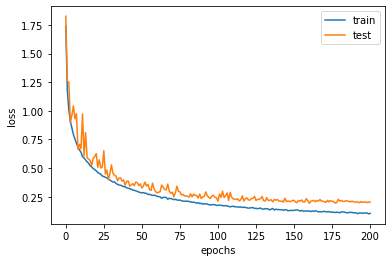

In [39]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

As per above, its clear that both validation and train dataset accuracy increased further by training the model to higher epochs and using early stopping.

### 6. Print the classification accuracy metrics (10 points)

In [40]:
# Evaluating the model performance on test data
model.evaluate(
    x=X_test, y=y_test, batch_size=None, verbose=1, sample_weight=None, steps=None,
    callbacks=None, max_queue_size=10, workers=1, use_multiprocessing=False,
    return_dict=False
)

563/563 [==============================] - 1s 2ms/step - loss: 0.5742 - sparse_categorical_accuracy: 0.8756


[0.5741923451423645, 0.8756111264228821]

In [44]:
from sklearn.metrics import classification_report,confusion_matrix

In [45]:
# Getting the predictions for test set
ytest_pred=np.argmax(model.predict(X_test),axis=-1)

In [46]:
# Loading the model, incase if below activities are done later-on. 
# If everything is done at a stretch then this step is not needed.
model=load_model('/content/drive/My Drive/final_model.h5')

In [47]:
# building a confusion matrix
cm=confusion_matrix(y_true=y_test,y_pred=ytest_pred,labels=list(range(0,10,1)))
cmdf=pd.DataFrame(data=cm,
                  columns=['Predict 0','Predict 1','Predict 2','Predict 3','Predict 4','Predict 5','Predict 6','Predict 7','Predict 8','Predict 9']
                  ,index=['Actual 0','Actual 1','Actual 2','Actual 3','Actual 4','Actual 5','Actual 6','Actual 7','Actual 8','Actual 9']
                  )
cmdf

,Predict 0,Predict 1,Predict 2,Predict 3,Predict 4,Predict 5,Predict 6,Predict 7,Predict 8,Predict 9
Actual 0,1649,28,16,13,12,8,16,22,14,36
Actual 1,23,1651,16,21,36,7,13,37,17,7
Actual 2,16,20,1603,25,18,9,6,51,25,30
Actual 3,12,40,29,1417,13,102,16,29,37,24
Actual 4,18,58,16,23,1605,15,10,11,20,36
Actual 5,17,13,9,63,8,1554,36,6,35,27
Actual 6,40,20,10,21,25,67,1540,11,79,19
Actual 7,15,44,22,9,10,11,12,1665,5,15
Actual 8,19,40,27,38,3,32,51,13,1527,62
Actual 9,44,35,33,24,15,37,8,28,30,1550


In [48]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


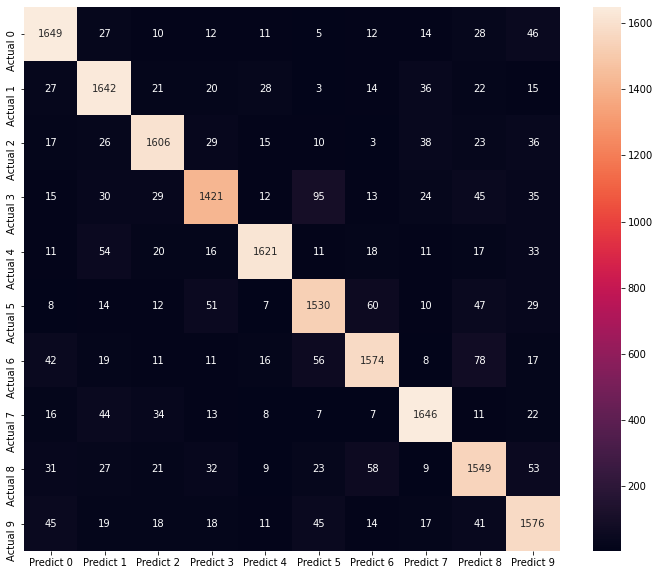

In [ ]:
# Plotting heatmap
plt.figure(figsize=(12,10))
sns.heatmap(cmdf,annot=True,fmt='g')

In [ ]:
print(classification_report(y_true=y_test,y_pred=ytest_pred,target_names=['0','1','2','3','4','5','6','7','8','9']))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90      1814
           1       0.86      0.90      0.88      1828
           2       0.90      0.89      0.90      1803
           3       0.88      0.83      0.85      1719
           4       0.93      0.89      0.91      1812
           5       0.86      0.87      0.86      1768
           6       0.89      0.86      0.87      1832
           7       0.91      0.91      0.91      1808
           8       0.83      0.85      0.84      1812
           9       0.85      0.87      0.86      1804

    accuracy                           0.88     18000
   macro avg       0.88      0.88      0.88     18000
weighted avg       0.88      0.88      0.88     18000



#### Conclusion:

1. Test accuracy for the final model is 88%
2. Though validation accuracy is around 96%, still test accuracy came in bit lower side. May be by getting more training dataset can help in further better results.
3. Seems model is not able to predict digit 3 well when compared to other digits. For 95 images, digit 3 is predicted as digit5. Need to check those images and understand the reason for this.
